In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import gspread as gs
import warnings
import sys
warnings.filterwarnings('ignore')

In [7]:
tech_tickers = ["AAPL","AMZN","TSLA", "NVDA", "MSFT", "GOOG","INTC", "DELL"]

In [39]:

class Returns_analysis():
    individual_stock_data = pd.DataFrame()
    Stock_Data = pd.DataFrame()
    stock_dict = {}
   
    def __init__(self,tickers : list,start_date):
            self.tickers = tickers
            self.start_date = start_date
           
    
    def individual_data(self, fill_method : str):
        yf.pdr_override()
        valid_fill_methods = ['linear', 'forward', 'backward']
        if fill_method not in valid_fill_methods:
                raise ValueError(f"Invalid fill method. Choose one of {valid_fill_methods}")
        for ticks in self.tickers:
                individual_stock_data = pdr.DataReader(ticks, self.start_date)
                if individual_stock_data.isnull().values.any(): # check if dataframe contains any missing values
                        if fill_method == 'forward':
                                individual_stock_data.ffill(inplace=True) # forward fill missing values
                        elif fill_method == 'backward':
                                individual_stock_data.bfill(inplace=True) # backward fill missing values
                        else:
                                individual_stock_data.interpolate(method=fill_method, inplace=True) # linear fill missing values
        Returns_Analysis.stock_dict.update({f"{ticks}_stock" : individual_stock_data})

    def download_stocks(self,method, column_name : str):
        yf.pdr_override()
        valid_fill_methods = ['linear', 'forward', 'backward']
        if method not in valid_fill_methods:
                raise ValueError(f"Invalid fill method. Choose one of {valid_fill_methods}")
        self.column_name = column_name
        for ticks in self.tickers:
                stock_data = pdr.DataReader(ticks, self.start_date)[column_name]
                stock_data.fillna(method= method, inplace=True)
                Returns_analysis.Stock_Data[ticks] = stock_data
        return Returns_analysis.Stock_Data




    def calculate_returns(self,return_type):
           self.return_type = return_type
           if return_type == "Log":
                returns_data = np.log(Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.shift(1))
           else: 
                returns_data = (Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.shift(1))-1
           return returns_data

    def normalization(self):
            normalized_data = (Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.iloc[0]*100)
            normalized_figure = normalized_data.plot(figsize = (19,6))
            plt.title("Growth Comparison of Stocks")
            return normalized_figure
    
    def individual_return(self):
            individual_return = self.calculate_returns(self.return_type).mean()*250*100

            print(f"The {self.return_type} return of the stocks are {round(individual_return,2)}")
        

    def portfolio_return(self,weights = list):
            import sys
            weights = np.array(weights)
            if round(sum(weights),2)!= 1 :
                raise ValueError(f"Sum of the weight of the porfolio should be 1,The sum of your weights are {sum(weights)}")
                if len(weights) != Returns_Analysis.Stock_Data.shape[1]:
                    sys.exit("The weights of individual security does not match the no. of securities")
            annual_returns = np.dot(self.calculate_returns(self.return_type).mean()*250, weights)

            print(f"The annual returns of the portfolio is {round(annual_returns, 2)}% ")


    def individual_risk_factor(self):
                risk_factor = pd.DataFrame(np.sqrt(self.calculate_returns(self.return_type).var()*250))
                print(risk_factor)

                print(f"The lowest risk factor is{risk_factor.min()}")

In [9]:
securities = Returns_analysis(tech_tickers, start_date = "2005-1-1")

In [19]:
securities.download_stocks(column_name= "Adj Close").fillna(method = "bfill")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,AMZN,TSLA,NVDA,MSFT,GOOG,INTC,DELL
Date,,,,,,,,
2005-01-03,0.963385,2.226000,1.592667,1.803384,18.860819,5.048826,13.828913,11.683001
2005-01-04,0.973279,2.107000,1.592667,1.718491,18.931351,4.844342,13.553180,11.683001
2005-01-05,0.981803,2.088500,1.592667,1.734552,18.889036,4.819685,13.421299,11.683001
2005-01-06,0.982564,2.052500,1.592667,1.717727,18.867868,4.696148,13.463260,11.683001
2005-01-07,1.054106,2.116000,1.592667,1.684840,18.811455,4.828153,13.667069,11.683001
...,...,...,...,...,...,...,...,...
2023-01-19,135.270004,93.680000,127.169998,167.649994,231.929993,93.910004,28.420000,39.142704
2023-01-20,137.869995,97.250000,133.419998,178.389999,240.220001,99.279999,29.219999,39.936268
2023-01-23,141.110001,97.519997,143.750000,191.929993,242.580002,101.209999,30.270000,40.709999


<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

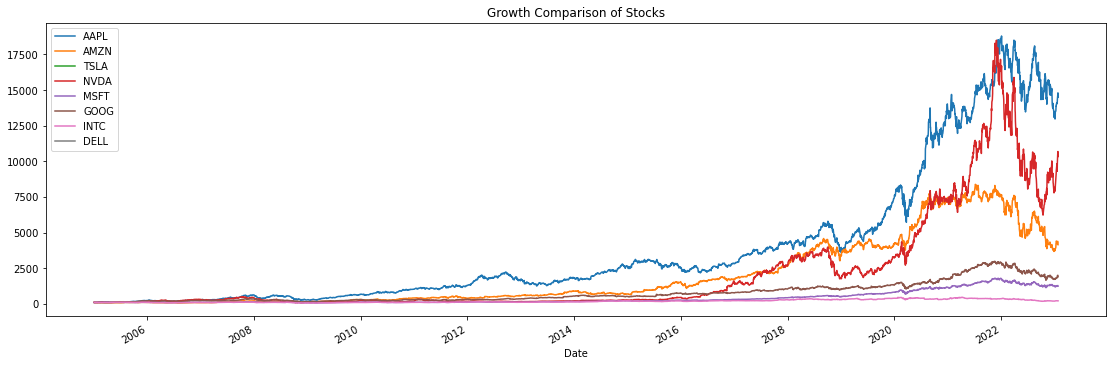

In [20]:
securities.normalization()

In [21]:
securities.calculate_returns("Simple")

,AAPL,AMZN,TSLA,NVDA,MSFT,GOOG,INTC,DELL
Date,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,0.010270,-0.053459,NaN,-0.047074,0.003740,-0.040501,-0.019939,NaN
2005-01-05,0.008758,-0.008780,NaN,0.009346,-0.002235,-0.005090,-0.009731,NaN
2005-01-06,0.000775,-0.017237,NaN,-0.009700,-0.001121,-0.025632,0.003126,NaN
2005-01-07,0.072811,0.030938,NaN,-0.019146,-0.002990,0.028109,0.015138,NaN
...,...,...,...,...,...,...,...,...
2023-01-19,0.000444,-0.018647,-0.012502,-0.035219,-0.016454,0.023208,-0.013537,-0.013993
2023-01-20,0.019221,0.038108,0.049147,0.064062,0.035744,0.057182,0.028149,0.020274
2023-01-23,0.023500,0.002776,0.077425,0.075901,0.009824,0.019440,0.035934,0.019374


In [16]:
securities.individual_return()

The Simple return of the stocks are AAPL    32.83
AMZN    27.82
TSLA    51.50
NVDA    37.18
MSFT    17.81
GOOG    20.65
INTC     9.04
DELL    25.41
dtype: float64


In [17]:
securities.individual_risk_factor()

             0
AAPL  0.329612
AMZN  0.384950
TSLA  0.570345
NVDA  0.482517
MSFT  0.274912
GOOG  0.300136
INTC  0.309157
DELL  0.357545
The lowest risk factor is0    0.274912
dtype: float64


<font face = "Times New Roman" size = 5>Parsing dates</font>

Applying Normalization

We use Normalization to visualize the data because we want to facilitate a comparison between the stock prices as if they were starting from a common point

if we don't use normalization we'll encounter variations at the beginning of the plot which won't help in analysis